Project: Individual Planning Stage  
Audrey So 98784200  
DSCI 100  
11 November 2025  

This project examines the relationship between gameplay activity and subscription rates. Higher gameplay activity, defined by total play hours and the number of gaming sessions, may indicate whether players are more likely to subscribe. This relationship is also arranged across gender groups to determine whether it remains consistent for each gender.

**Broad Question**: (1) What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these differ between player types?  
**Specific Question**: Do players with higher gameplay activity (total hours + total sessions) have higher subscription rates, and does this differ by gender?

In [8]:
library(tidyverse)
library(readr)

In [7]:
#1. Data Description
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")
summary(players)
summary(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

The 'players' dataset contains information on 196 players, including experience, subscription status, played hours, gender, age, and name. The outcome variable is "subscribe", with the predictors "played_hours" and "gender". The summary show that hours played are skewed (median = 0.1, mean = 5.85), and 144 of 196 players are subscribed. The 'sessions' dataset contains 1,535 gaming sessions with start and end times of each session, which is linked to the 'players' dataset through the category "hashedEmail". Merging these datasets allows calculation of overall gameplay activity.

In [11]:
#2. Exploratory Data Analysis
library(dplyr)

sessions_summary <- sessions |>
    group_by(hashedEmail) |>
    summarise(total_sessions = n())

players_summary <- players |>
    left_join(sessions_summary, by = "hashedEmail") |>
    mutate(total_sessions = ifelse(is.na(total_sessions), 0, total_sessions))

players_summary |> 
    summarise(mean_played_hours = round(mean(played_hours), 2),
    mean_total_sessions = round(mean(total_sessions), 2))
players_summary

mean_played_hours,mean_total_sessions
<dbl>,<dbl>
5.85,7.83


experience,subscribe,hashedEmail,played_hours,name,gender,Age,total_sessions
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,0
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,0
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,1
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47,1


We first calculated total sessions per player from the sessions dataset and merged this data into players to create players_summary, which includes played hours, gender, subscription status, and total sessions. Mean total play hours across all players is 5.85, and mean total sessions is 7.83. This step allows us to examine patterns between gameplay activity and subscription status, and later arrange by gender.

In [17]:
players_summary_grouped <- players_summary |>
    group_by(subscribe, gender) |>
    summarise(mean_played_hours = round(mean(played_hours), 2),
    mean_total_sessions = round(mean(total_sessions), 2)) |>
    arrange(subscribe, gender)
players_summary_grouped

`summarise()` has grouped output by 'subscribe'. You can override using the
`.groups` argument.


subscribe,gender,mean_played_hours,mean_total_sessions
<lgl>,<chr>,<dbl>,<dbl>
FALSE,Female,0.43,2.25
FALSE,Male,0.60,2.35
FALSE,Non-binary,0.68,0.75
FALSE,Prefer not to say,0.21,1.14
FALSE,Two-Spirited,0.00,0.50
TRUE,Agender,6.25,5.00
TRUE,Female,13.45,12.55
TRUE,Male,5.30,10.13
TRUE,Non-binary,20.05,9.18


Grouping the data by subscription status indicates that subscribers generally have higher play hours and session counts than non-subscribers. Meanwhile, grouping the data by gender demonstrates female and non-binary subscribers have the highest mean play hours, while males have the highest mean sessions.

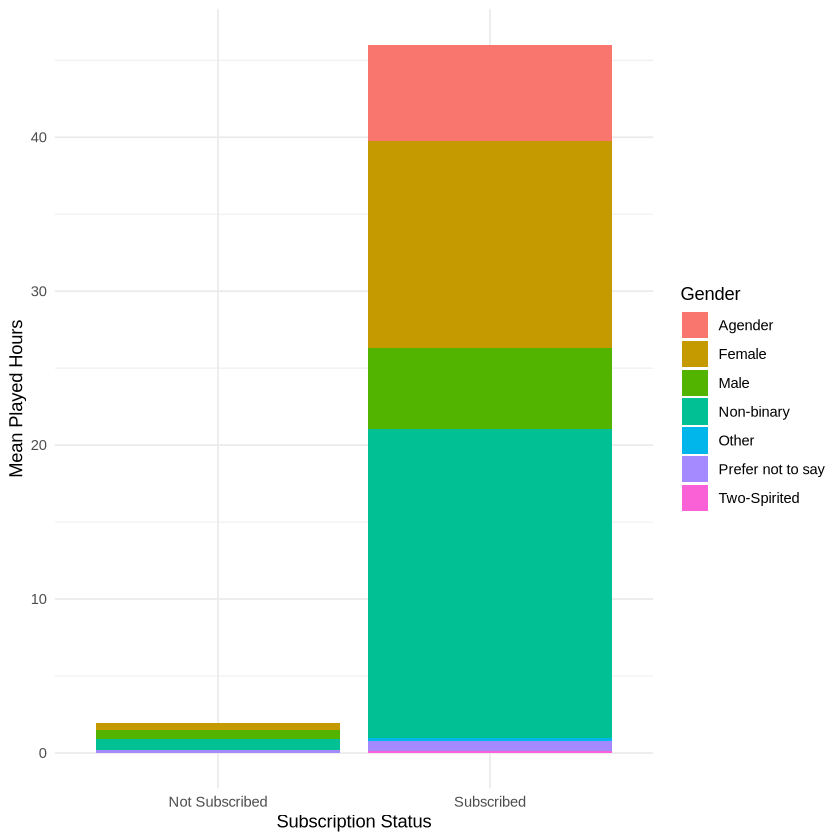

In [18]:
#3. Visualisation
library(ggplot2)

players_summary_plot <- ggplot(players_summary_grouped, 
    aes(x = subscribe, y = mean_played_hours, fill = gender)) +
    geom_col() +
    labs(x = "Subscription Status", y = "Mean Played Hours", fill = "Gender") +
    scale_x_discrete(labels = c("FALSE" = "Not Subscribed", "TRUE" = "Subscribed")) +
    theme_minimal()
players_summary_plot

This bar chart visualizes mean gameplay activity, arranged by subscription and gender. Subscription status is on the X-axis, mean number of hours on the y-axis, and the bars are coloured by different gender groups. This highlights the relationship between subscription status and gameplay activity, showing that subscribed players tend to play more, with differences between genders.

**Methods and Plan**  
A multiple linear regression model will be used to examine the effects of different factors on subscription status. This method is appropriate because the outcome is continuous and multiple predictors can be assessed simultaneously. This is done under the assumption that the relationship is linear to begin with, and each variable is independent from each other. However, this regression model can be limited because it is sensitive to outliers and has a limited ability to capture non-linear relationships. Afterwards, the dataset will be split 70%/30% into training and testing sets to support accurate training and prediction of the multi-linear regression model. 